Project 2: Solving Partial Differential Equations using Method of Finite Differences
====================================================================================
***By Robert Malcolm Norden***

## The 1-D Heat Equation

### Background

The heat equation is a partial differential equation which attempts to model both the transient and steady state temperature profiles and gradients within systems. The equation is based off of fourier's law for heat flux listed below:

$$ q = -k \nabla T $$

where q is heat flux, k is thermal conductivity, and T is temperature

### The Problem Statement

Say there is a metal bar uniform in k and of length L. Given a variety of boundary conditions how could the temperature profile of the bar vary over time.

### Derivation

Take an arbitrary slice of the bar of thickness $\Delta x$. This slice will have some flux, $q$, flowing into this slice and out of this slice over some time, $\Delta t$. We can write an expression for the change in internal energy over time:

$$U\rvert_{t+\Delta t} - U\rvert_{t} = (q\rvert_{x} - q\rvert_{x+\Delta x})A\Delta t$$

Using the specific heat capacity the above expression can be simplified further:

$$\Delta m \hat{C_p} (T\rvert_{t+\Delta t} - T\rvert_{t}) = (q\rvert_{x} - q\rvert_{x+\Delta x})A\Delta t$$

The change of mass through the control area can be simplified even further by using the constant cross sectional area of the bar

$$A\rho \Delta x \hat{C_p} (T\rvert_{t+\Delta t} - T\rvert_{t}) = (q\rvert_{x} - q\rvert_{x+\Delta x})A\Delta t$$

The cross sectional area can be divided through leaving this expression

$$\rho \Delta x \hat{C_p} (T\rvert_{t+\Delta t} - T\rvert_{t}) = (q\rvert_{x} - q\rvert_{x+\Delta x})\Delta t$$

This equation can be rearranged in a new form:

$$\rho \hat{C_p} (\frac{T\rvert_{t+\Delta t} - T\rvert_{t}}{\Delta t}) = -\frac{(q\rvert_{x+\Delta x} - q\rvert_{x})}{\Delta x}$$

This follows the familiar definition of a derivative:

$$\frac{df}{dx} = \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

Applying this to the balance equation

$$\rho \hat{C_p} \frac{\partial T}{\partial t} = -\frac{\partial q}{\partial x}$$

When factoring in Fourier's Law

$$ \frac{\partial T}{\partial t} = \frac{k}{\rho \hat{C_p}}\frac{\partial ^ 2 T}{\partial x ^ 2}$$

The quantity, $\frac{k}{\rho \hat{C_p}}$, is also known as the thermal diffusivity, and is represented as $\alpha$, leaving the final expression:

$$ \frac{\partial T}{\partial t} = \alpha \frac{\partial ^ 2 T}{\partial x ^ 2}$$

### Adaptation to Method of Finite Differences

The method of finite differences attempts to use discrete steps and estimates on past and future points to estimate the value of a partial differential equation. 

A single derivative can be approximated by evaluating the slope between to points very close together. For the case of a temperature over a distance can be approximated using a forward or backward derivative.

(Forward) $\frac{\partial T}{\partial x} \approx \frac{T_{i+1}-T_{i}}{\Delta x}$

(Backwards) $\frac{\partial T}{\partial x} \approx \frac{T_{i}-T_{i-1}}{\Delta x}$

To find the second derivative a similar method can be used where the average slope between these two first derivative approximations are used

$$\frac{\partial ^2 T}{\partial x^2} \approx \frac{\frac{T_{i+1}-T_{i}}{\Delta x}-\frac{T_{i}-T_{i-1}}{\Delta x}}{\Delta x} = \frac{T_{i+1} + T_{i - 1} - 2 T_i}{\Delta x ^2}$$

Applying this relation and discretizing the partial derivative with respect to time, a function of the temperature at time step $j+1$ and position i can be expressed as follows:

$$ T_{i,j+1} = T_{i,j} + \frac{\alpha \Delta t}{\Delta x ^ 2}(T_{i+1,j} + T_{i - 1,j} - 2 T_{i,j})


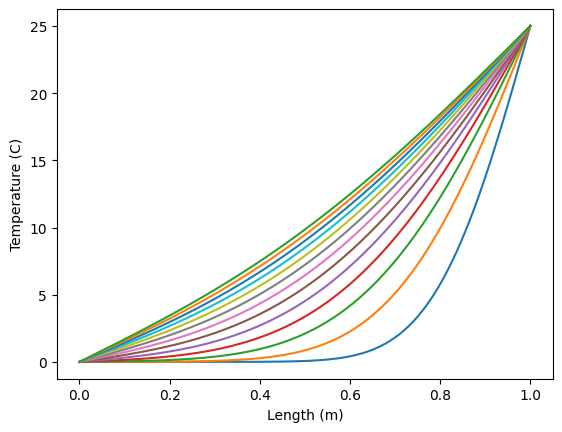

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

def solve_PDE(alpha=0.00000405 * 60,barLength=1,timeSpan=800,xPoints=300,shouldPlot=True,numPlotted=15,plot3D=False):

    tPoints = int(np.floor(timeSpan/((0.49999 / alpha) * ((barLength / xPoints) ** 2))))

    plotIndices = np.linspace(0,tPoints-1,numPlotted,dtype=int)

    result = np.zeros((tPoints,xPoints))
    stepFactor = ((timeSpan / tPoints) / ((barLength / xPoints) ** 2)) * alpha

    for time in result:
        time[-1] = 25

    for j in range(1,tPoints-1):
        for i in range(1,xPoints-1):
            result[j][i] = result[j-1][i] + stepFactor * (result[j-1][i+1] + result[j-1][i-1] - 2 * result[j-1][i])
        if (j in plotIndices) and shouldPlot:
            plt.plot(np.linspace(0,barLength,xPoints),result[j])
    
    if(shouldPlot):
        plt.xlabel("Length (m)")
        plt.ylabel("Temperature (C)");

    if(plot3D):
        fig1 = plt.figure()
        ax1 = plt.axes(projection='3d')

        time_vals = np.linspace(0, timeSpan, tPoints)
        x_vals = np.linspace(0, barLength, xPoints)
        timeGrid, xGrid = np.meshgrid(time_vals, x_vals, indexing='ij')

        ax1.plot_surface(timeGrid,xGrid, result,cmap='inferno',alpha=1.0,antialiased=True,linewidth=0,edgecolor='none')
        ax1.view_init(elev=15,azim=45+90+60 + 8)
        ax1.set_xlabel("Time (min)")
        ax1.set_ylabel("Length (m)")
        ax1.set_zlabel("Temperature (C)")
        ax1.set_xticks([0, 200, 400, 600, 800])
        ax1.set_xlim([0,800]);
        
    return [result,np.linspace(0,barLength,xPoints),(timeSpan/tPoints)];
solve_PDE();

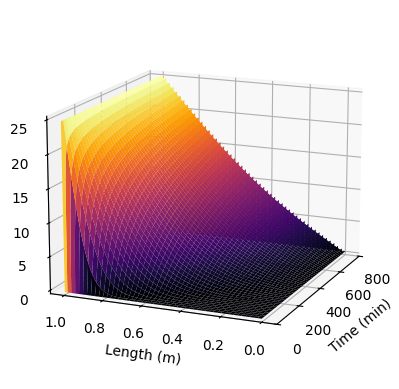

In [73]:
solve_PDE(plot3D=True,shouldPlot=False);

Text(0, 0.5, 'Change in Integrated Area')

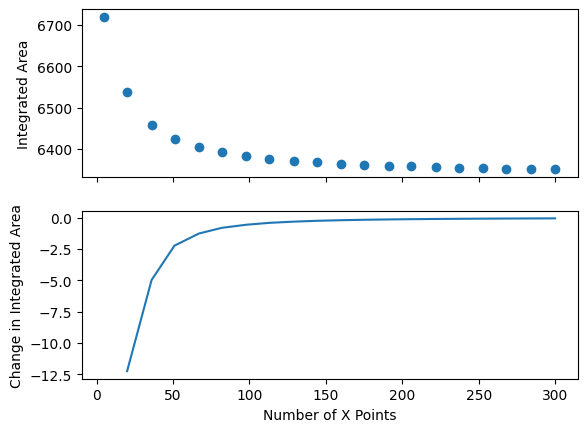

In [ ]:
xEval = np.linspace(5,300,20,dtype=int)
integratedArea = np.zeros(np.size(xEval))

for i in range(len(xEval)):
    area = 0
    newResult, xs, tstep = solve_PDE(xPoints=xEval[i],shouldPlot=False)
    for timeStep in newResult:
        area += tstep * scipy.integrate.trapezoid(x=xs,y=timeStep)
    integratedArea[i] = area

gradient = np.zeros(np.size(integratedArea))
gradient[0] = 10000
for i in range(1,len(integratedArea)):
    gradient[i] = (integratedArea[i]-integratedArea[i-1])/(xEval[i]-xEval[i-1])
fig1, (ax2,ax3) = plt.subplots(nrows=2,ncols=1,sharex=True)
ax2.scatter(xEval,integratedArea)
ax3.plot(xEval[1:],gradient[1:])
ax3.set_xlabel("Number of X-Points")
ax2.set_ylabel("Integrated Area")
ax3.set_ylabel("Change in Integrated Area");


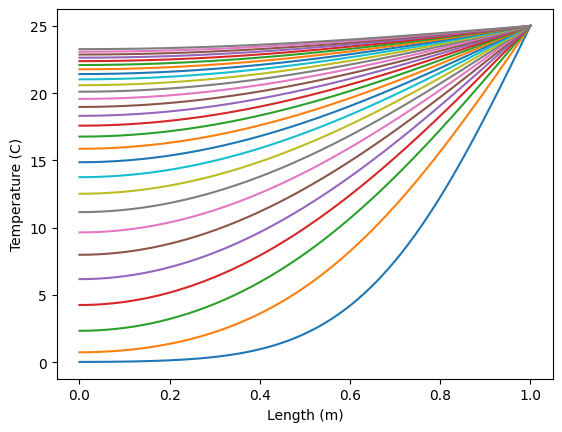

In [77]:
def solve_PDE_noFluxAtZero(alpha=0.00000405 * 60,barLength=1,timeSpan=5000,xPoints=300,shouldPlot=True,numPlotted=15,plot3D=False):

    tPoints = int(np.floor(timeSpan/((0.49999 / alpha) * ((barLength / xPoints) ** 2))))

    plotIndices = np.linspace(0,tPoints-1,numPlotted,dtype=int)

    result = np.zeros((tPoints,xPoints))
    stepFactor = ((timeSpan / tPoints) / ((barLength / xPoints) ** 2)) * alpha

    for time in result:
        time[-1] = 25

    for j in range(1,tPoints-1):
        result[j][0] = result[j-1][1]
        for i in range(1,xPoints-1):
            result[j][i] = result[j-1][i] + stepFactor * (result[j-1][i+1] + result[j-1][i-1] - 2 * result[j-1][i])
        if (j in plotIndices) and shouldPlot:
            plt.plot(np.linspace(0,barLength,xPoints),result[j])
    if(shouldPlot):
        plt.xlabel("Length (m)")
        plt.ylabel("Temperature (C)");
    
    if(plot3D):
        fig4 = plt.figure()
        ax4 = plt.axes(projection='3d')

        time_vals = np.linspace(0, timeSpan, tPoints)
        x_vals = np.linspace(0, barLength, xPoints)
        timeGrid, xGrid = np.meshgrid(time_vals, x_vals, indexing='ij')

        ax4.plot_surface(timeGrid,xGrid, result,cmap='inferno',alpha=1.0,antialiased=True,linewidth=0,edgecolor='none')
        ax4.view_init(elev=15,azim=45+90+60 + 8)
        ax4.set_xlabel("Time (min)")
        ax4.set_ylabel("Length (m)")
        ax4.set_zlabel("Temperature (C)")

        
    return [result,np.linspace(0,barLength,xPoints),(timeSpan/tPoints)]

solve_PDE_noFluxAtZero(xPoints=300,timeSpan=5000,numPlotted=30);

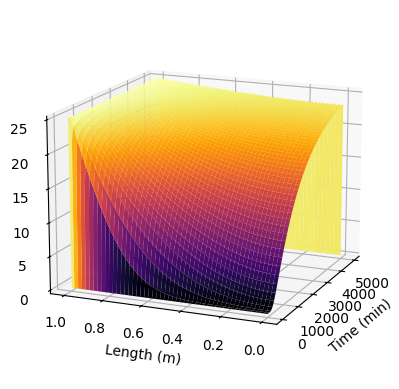

In [80]:
solve_PDE_noFluxAtZero(shouldPlot=False,plot3D=True,timeSpan=5000);

5
20
36
51
67
82
98
113
129
144
160
175
191
206
222
237
253
268
284
300


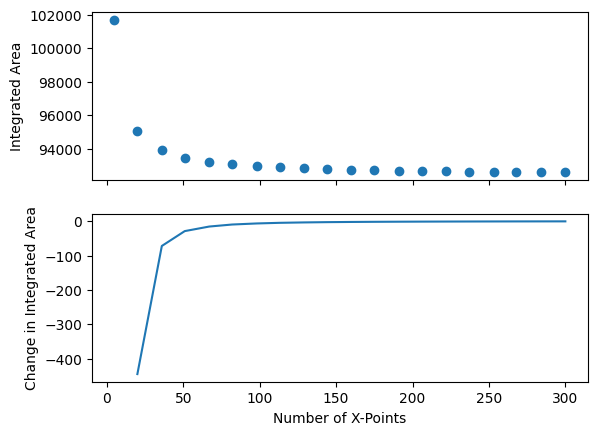

In [ ]:
xEval = np.linspace(5,300,20,dtype=int)
integratedArea = np.zeros(np.size(xEval))

for i in range(len(xEval)):
    area = 0
    newResult, xs, tstep = solve_PDE_noFluxAtZero(xPoints=xEval[i],shouldPlot=False,timeSpan=5000)

    for timeStep in newResult:
        area += tstep * scipy.integrate.trapezoid(x=xs,y=timeStep)
        
    integratedArea[i] = area

gradient = np.zeros(np.size(integratedArea))
gradient[0] = 10000
for i in range(1,len(integratedArea)):
    gradient[i] = (integratedArea[i]-integratedArea[i-1])/(xEval[i]-xEval[i-1])
fig1, (ax5,ax6) = plt.subplots(nrows=2,ncols=1,sharex=True)
ax5.scatter(xEval,integratedArea)
ax6.plot(xEval[1:],gradient[1:])
ax6.set_xlabel("Number of X-Points")
ax5.set_ylabel("Integrated Area")
ax6.set_ylabel("Change in Integrated Area");